In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

422652

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

422652

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

56295

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

56295

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

433142

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

433142

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_vanilla_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 187s 14ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0014 - val_mae: 0.0285 - val_mse: 0.0014
Epoch 2/50
13208/13208 [==============================] - 355s 27ms/step - loss: 0.0010 - mae: 0.0229 - mse: 0.0010 - val_loss: 0.0010 - val_mae: 0.0232 - val_mse: 0.0010
Epoch 3/50
13208/13208 [==============================] - 323s 24ms/step - loss: 9.4685e-04 - mae: 0.0220 - mse: 9.4685e-04 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011
Epoch 4/50
13208/13208 [==============================] - 346s 26ms/step - loss: 8.7376e-04 - mae: 0.0212 - mse: 8.7376e-04 - val_loss: 0.0010 - val_mae: 0.0260 - val_mse: 0.0010
Epoch 5/50
13208/13208 [==============================] - 381s 29ms/step - loss: 8.5582e-04 - mae: 0.0210 - mse: 8.5582e-04 - val_loss: 0.0013 - val_mae: 0.0269 - val_mse: 0.0013


13536/13536 [==============================] - 175s 13ms/step - loss: 0.0011 - mae: 0.0222 - mse: 0.0011
test loss, test acc: [0.0010574010666459799, 0.022241292521357536, 0.0010574010666459799]


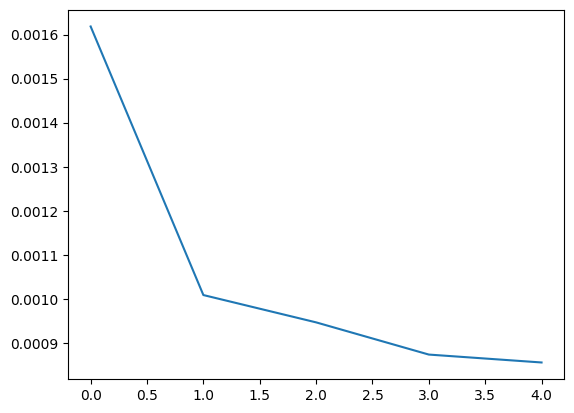

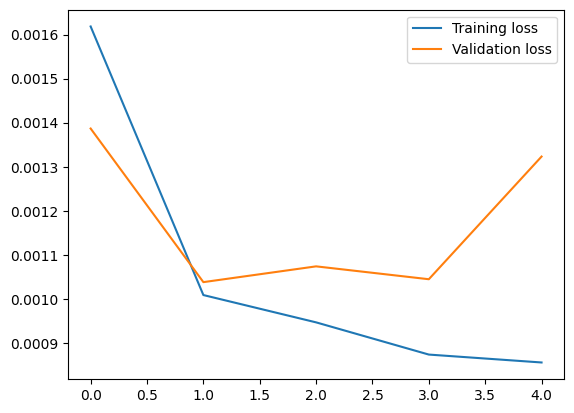

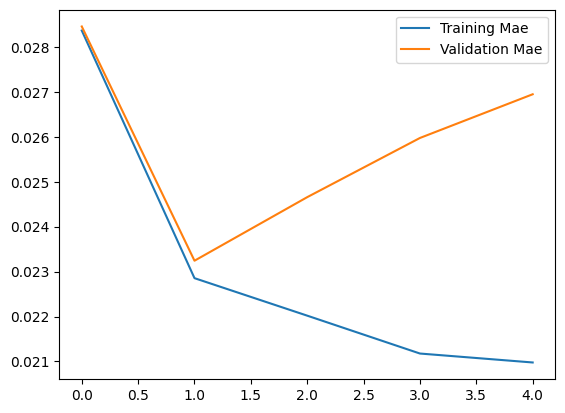

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 144s 11ms/step


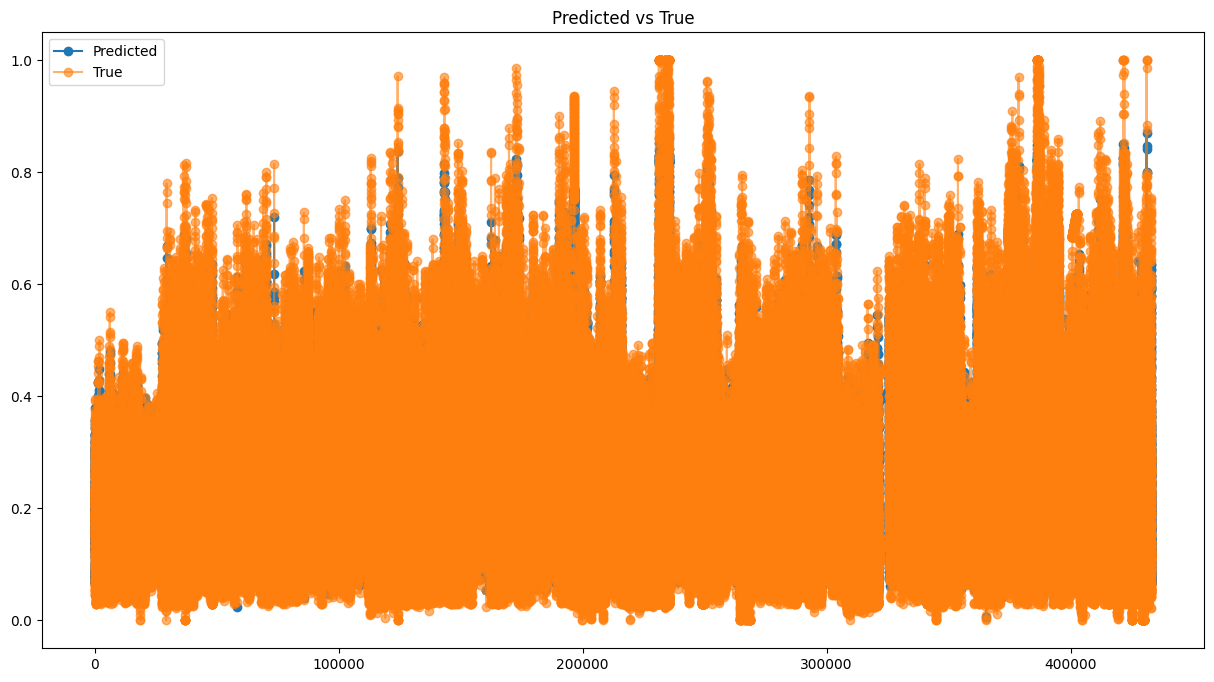

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.022241255612392073,
 'mse': 0.03251771304307012,
 'rmse': 0.0010574016615514524}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_vanilla_NO_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 368s 28ms/step - loss: 3.0089e-04 - mae: 0.0107 - mse: 3.0089e-04 - val_loss: 2.2844e-04 - val_mae: 0.0099 - val_mse: 2.2844e-04
Epoch 2/50
13208/13208 [==============================] - 397s 30ms/step - loss: 1.7457e-04 - mae: 0.0082 - mse: 1.7457e-04 - val_loss: 2.1818e-04 - val_mae: 0.0098 - val_mse: 2.1818e-04
Epoch 3/50
13208/13208 [==============================] - 398s 30ms/step - loss: 1.6605e-04 - mae: 0.0079 - mse: 1.6605e-04 - val_loss: 2.0632e-04 - val_mae: 0.0093 - val_mse: 2.0632e-04
Epoch 4/50
13208/13208 [==============================] - 429s 32ms/step - loss: 1.6411e-04 - mae: 0.0078 - mse: 1.6411e-04 - val_loss: 2.0093e-04 - val_mae: 0.0091 - val_mse: 2.0093e-04


13536/13536 [==============================] - 171s 13ms/step - loss: 2.8831e-04 - mae: 0.0113 - mse: 2.8831e-04
test loss, test acc: [0.0002883100532926619, 0.011330272071063519, 0.0002883100532926619]


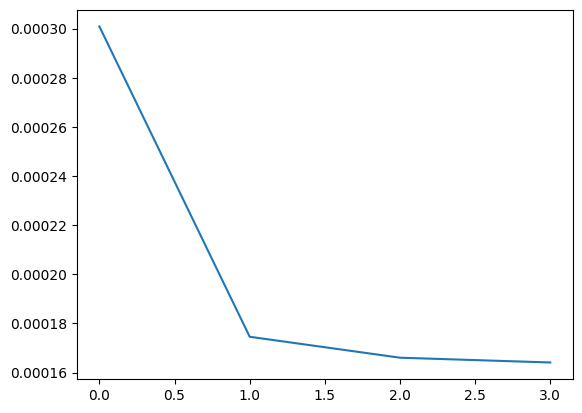

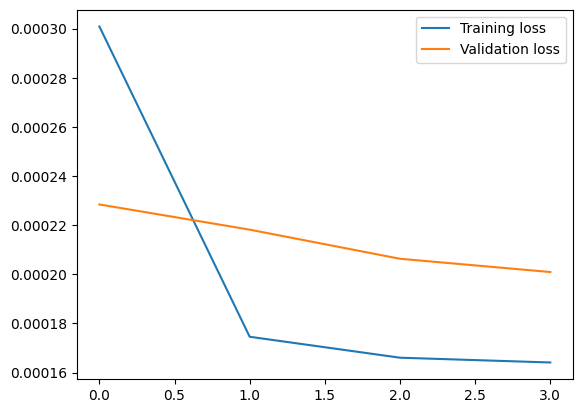

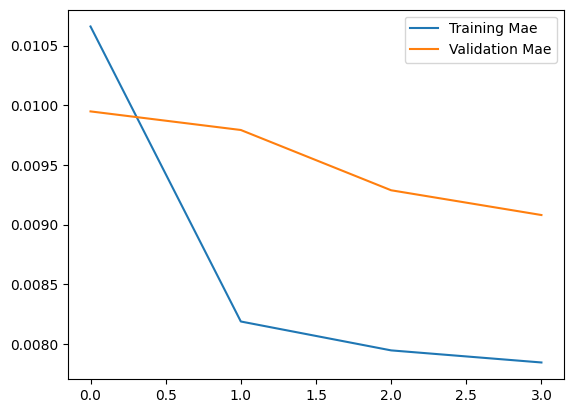

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 164s 12ms/step


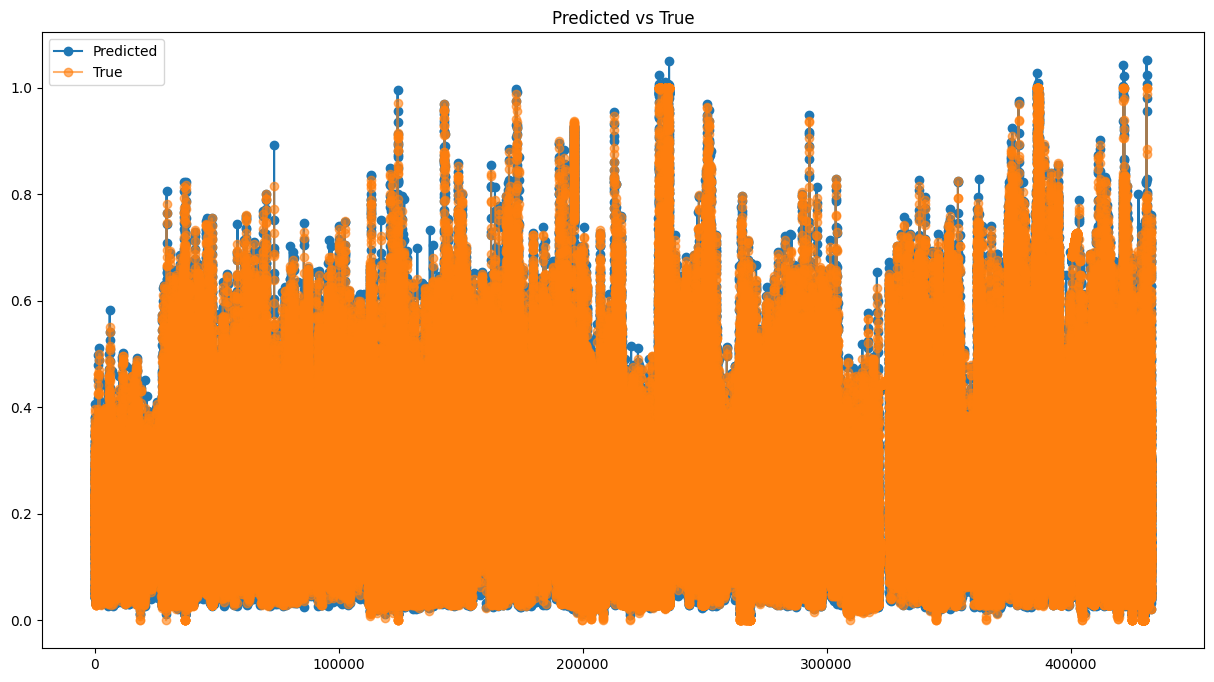

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01133028463552045,
 'mse': 0.016979718736122276,
 'rmse': 0.0002883108483578219}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_stacked_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 774s 58ms/step - loss: 0.0016 - mae: 0.0278 - mse: 0.0016 - val_loss: 0.0013 - val_mae: 0.0271 - val_mse: 0.0013
Epoch 2/50
13208/13208 [==============================] - 762s 58ms/step - loss: 9.2600e-04 - mae: 0.0218 - mse: 9.2600e-04 - val_loss: 7.3442e-04 - val_mae: 0.0199 - val_mse: 7.3442e-04
Epoch 3/50
13208/13208 [==============================] - 512s 39ms/step - loss: 8.6279e-04 - mae: 0.0209 - mse: 8.6279e-04 - val_loss: 7.2444e-04 - val_mae: 0.0219 - val_mse: 7.2444e-04
Epoch 4/50
13208/13208 [==============================] - 321s 24ms/step - loss: 8.2664e-04 - mae: 0.0205 - mse: 8.2664e-04 - val_loss: 8.3879e-04 - val_mae: 0.0217 - val_mse: 8.3879e-04
Epoch 5/50
13208/13208 [==============================] - 379s 29ms/step - loss: 8.1889e-04 - mae: 0.0203 - mse: 8.1889e-04 - val_loss: 7.6937e-04 - val_mae: 0.0200 - val_mse: 7.6937e-04


13536/13536 [==============================] - 142s 10ms/step - loss: 6.1413e-04 - mae: 0.0164 - mse: 6.1413e-04
test loss, test acc: [0.0006141329067759216, 0.016414355486631393, 0.0006141329067759216]


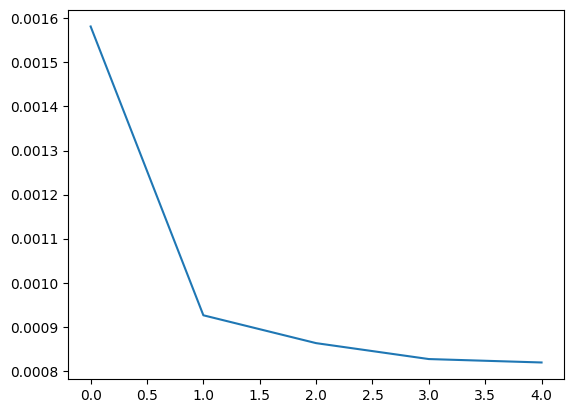

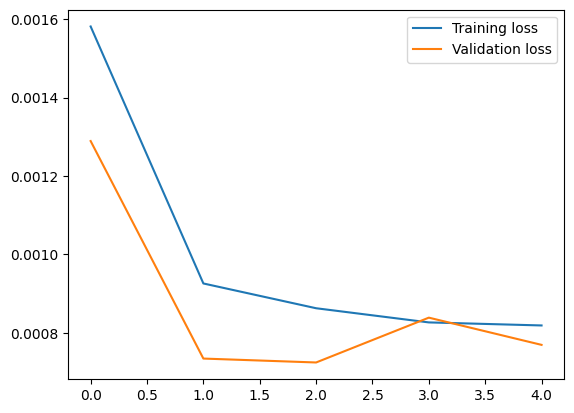

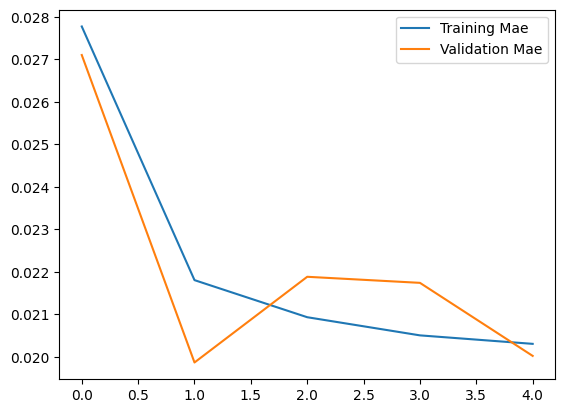

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 117s 9ms/step


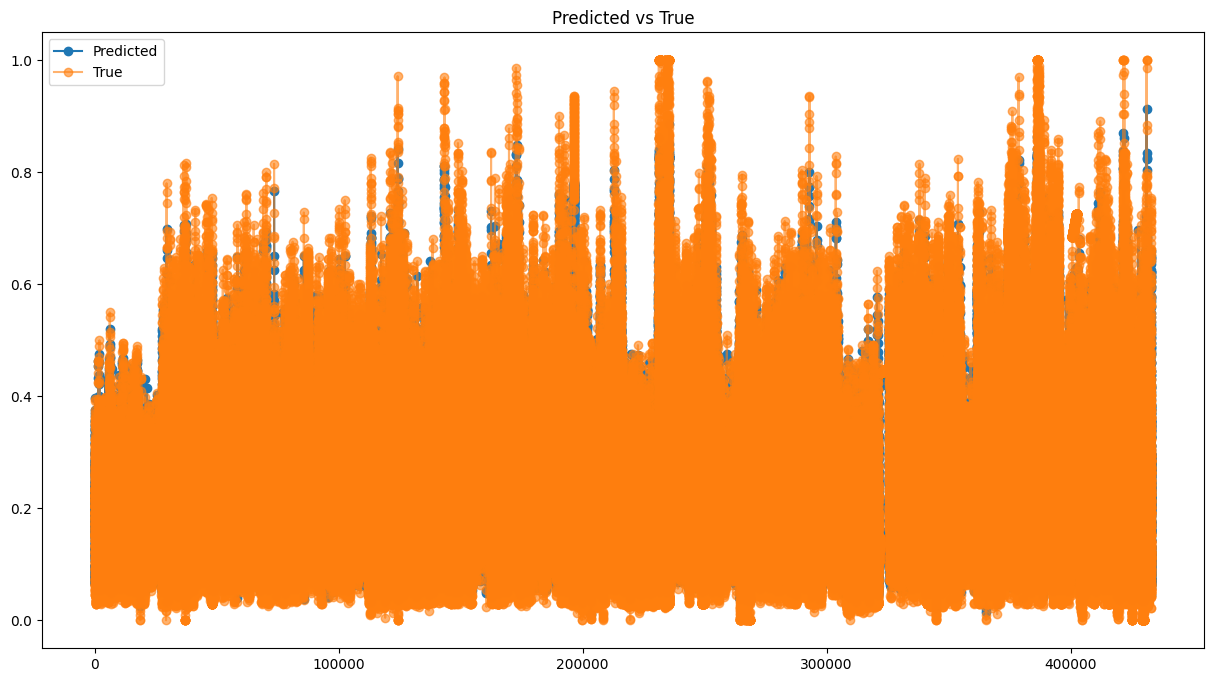

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01641434756480801,
 'mse': 0.024781721722276558,
 'rmse': 0.0006141337315203538}

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_stacked_NO_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 356s 27ms/step - loss: 4.4248e-04 - mae: 0.0125 - mse: 4.4248e-04 - val_loss: 2.3114e-04 - val_mae: 0.0101 - val_mse: 2.3114e-04
Epoch 2/50
13208/13208 [==============================] - 606s 46ms/step - loss: 1.8242e-04 - mae: 0.0085 - mse: 1.8242e-04 - val_loss: 2.2226e-04 - val_mae: 0.0097 - val_mse: 2.2226e-04
Epoch 3/50
13208/13208 [==============================] - 709s 54ms/step - loss: 1.7111e-04 - mae: 0.0081 - mse: 1.7111e-04 - val_loss: 2.1755e-04 - val_mae: 0.0097 - val_mse: 2.1755e-04
Epoch 4/50
13208/13208 [==============================] - 581s 44ms/step - loss: 1.6703e-04 - mae: 0.0080 - mse: 1.6703e-04 - val_loss: 2.0500e-04 - val_mae: 0.0092 - val_mse: 2.0500e-04


13536/13536 [==============================] - 115s 9ms/step - loss: 2.9788e-04 - mae: 0.0116 - mse: 2.9788e-04
test loss, test acc: [0.0002978788979817182, 0.011577642522752285, 0.0002978788979817182]


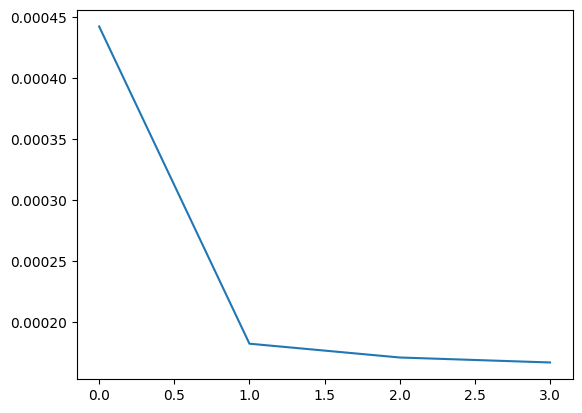

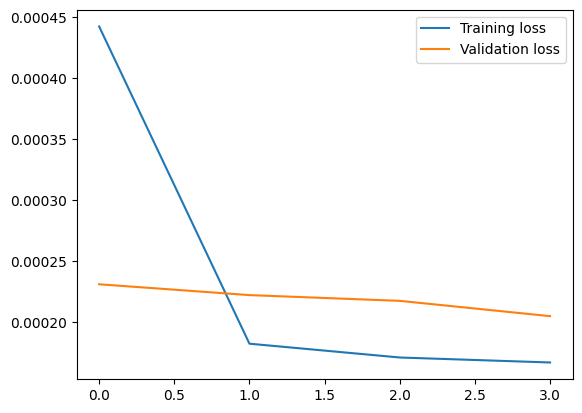

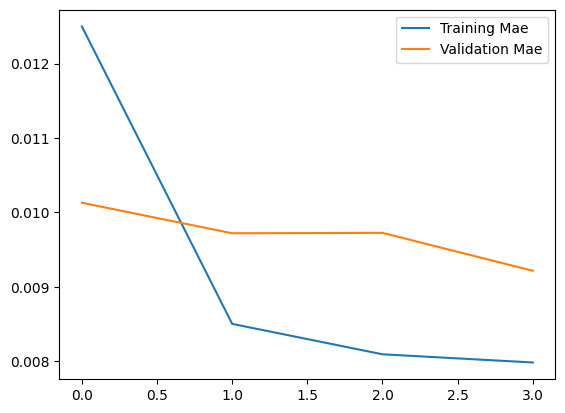

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 209s 15ms/step


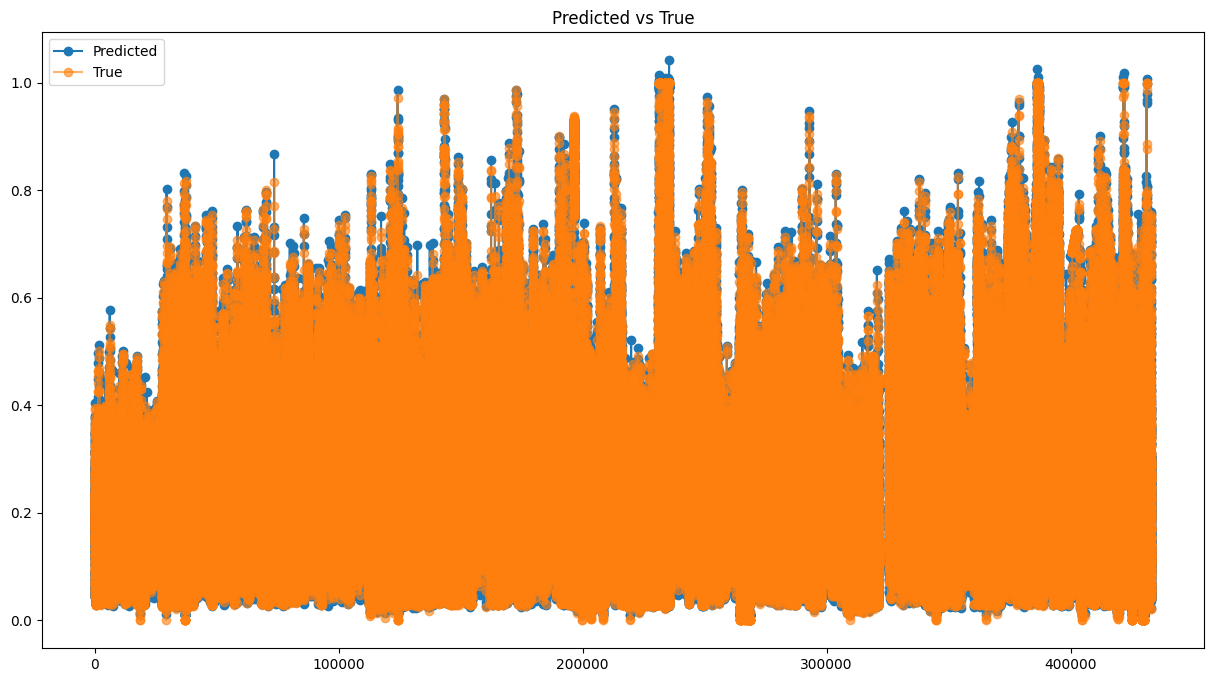

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011577652274631945,
 'mse': 0.017259172448852025,
 'rmse': 0.0002978790336192128}

# Entrenamiento Bidirectional LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                        

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_bidirectional_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 415s 31ms/step - loss: 0.0015 - mae: 0.0278 - mse: 0.0015 - val_loss: 0.0014 - val_mae: 0.0289 - val_mse: 0.0014
Epoch 2/50
13208/13208 [==============================] - 224s 17ms/step - loss: 9.9405e-04 - mae: 0.0226 - mse: 9.9405e-04 - val_loss: 0.0014 - val_mae: 0.0282 - val_mse: 0.0014
Epoch 3/50
13208/13208 [==============================] - 228s 17ms/step - loss: 9.1483e-04 - mae: 0.0217 - mse: 9.1483e-04 - val_loss: 0.0010 - val_mae: 0.0232 - val_mse: 0.0010
Epoch 4/50
13208/13208 [==============================] - 229s 17ms/step - loss: 8.6491e-04 - mae: 0.0210 - mse: 8.6491e-04 - val_loss: 0.0016 - val_mae: 0.0274 - val_mse: 0.0016
Epoch 5/50
13208/13208 [==============================] - 246s 19ms/step - loss: 8.4014e-04 - mae: 0.0208 - mse: 8.4014e-04 - val_loss: 0.0012 - val_mae: 0.0251 - val_mse: 0.0012
Epoch 6/50
13208/13208 [==============================] - 224s 17ms/step - loss: 8.3940e-04 - mae: 0.0207 - mse: 

13536/13536 [==============================] - 80s 6ms/step - loss: 7.0541e-04 - mae: 0.0184 - mse: 7.0541e-04
test loss, test acc: [0.0007054079324007034, 0.018388615921139717, 0.0007054079324007034]


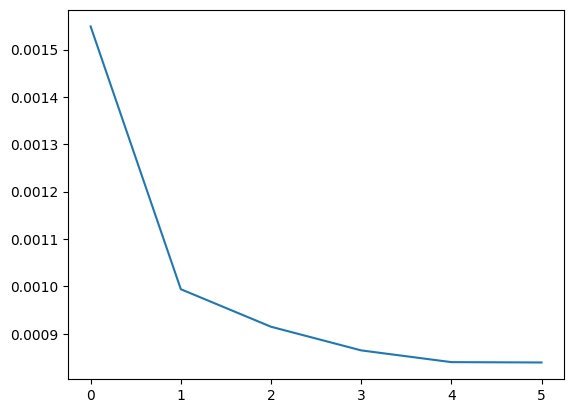

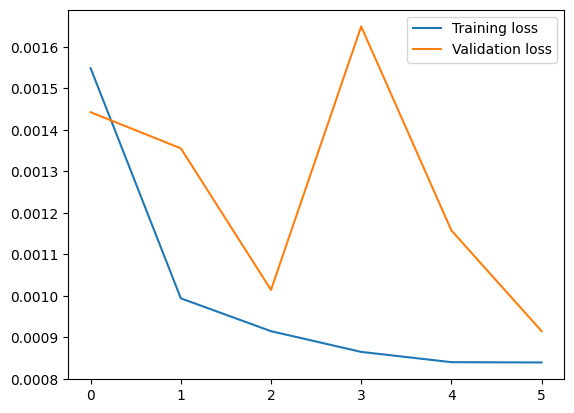

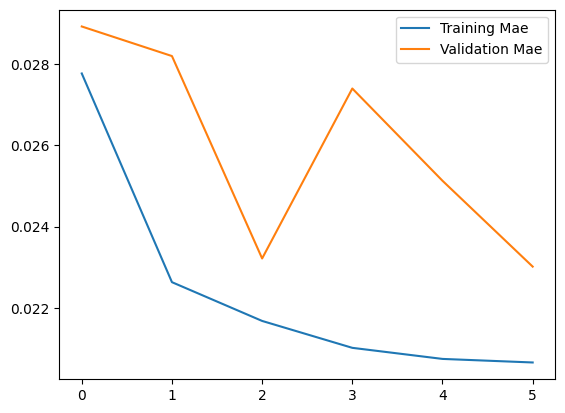

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 79s 6ms/step


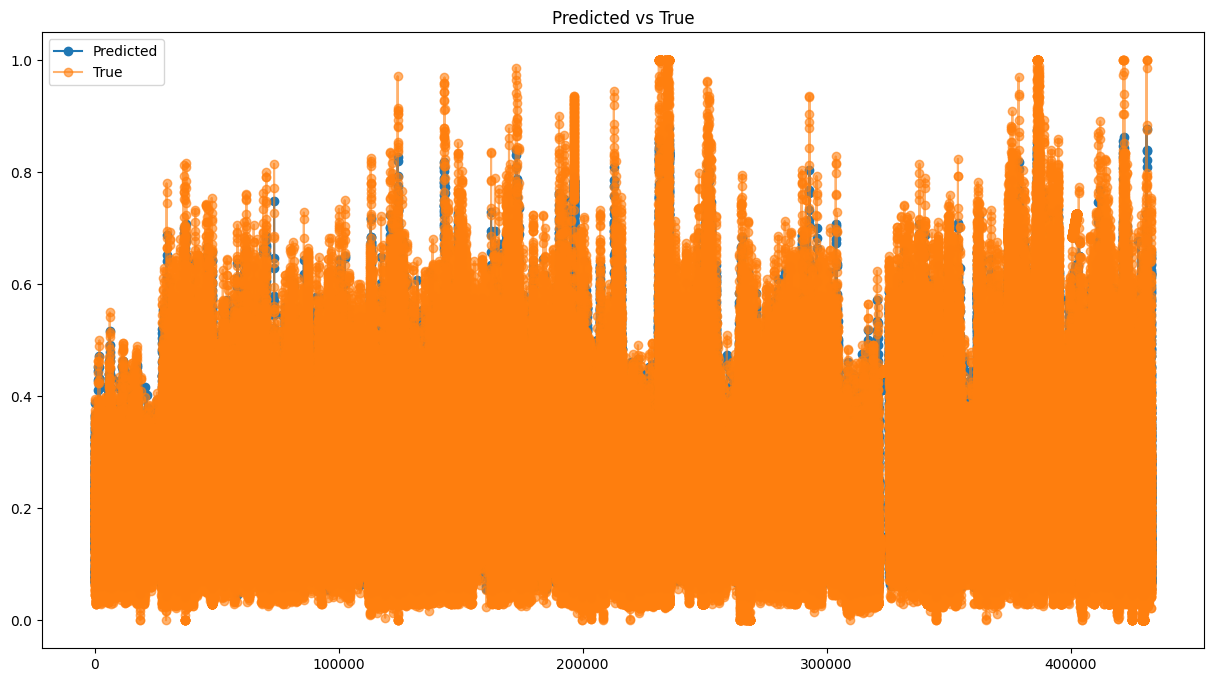

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.018388643014387314,
 'mse': 0.026559497540052393,
 'rmse': 0.0007054069095800491}

# Entrenamiento Bidirectional LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_bidirectional_NO_dropout.h5')

Epoch 1/50
13208/13208 [==============================] - 237s 18ms/step - loss: 3.5339e-04 - mae: 0.0116 - mse: 3.5339e-04 - val_loss: 2.1588e-04 - val_mae: 0.0092 - val_mse: 2.1588e-04
Epoch 2/50
13208/13208 [==============================] - 230s 17ms/step - loss: 1.7518e-04 - mae: 0.0082 - mse: 1.7518e-04 - val_loss: 2.0778e-04 - val_mae: 0.0092 - val_mse: 2.0778e-04
Epoch 3/50
13208/13208 [==============================] - 228s 17ms/step - loss: 1.6499e-04 - mae: 0.0078 - mse: 1.6499e-04 - val_loss: 1.9965e-04 - val_mae: 0.0090 - val_mse: 1.9965e-04
Epoch 4/50
13208/13208 [==============================] - 231s 17ms/step - loss: 1.6276e-04 - mae: 0.0078 - mse: 1.6276e-04 - val_loss: 1.9583e-04 - val_mae: 0.0087 - val_mse: 1.9583e-04


13536/13536 [==============================] - 90s 7ms/step - loss: 2.7889e-04 - mae: 0.0109 - mse: 2.7889e-04
test loss, test acc: [0.0002788890269584954, 0.010905410163104534, 0.0002788890269584954]


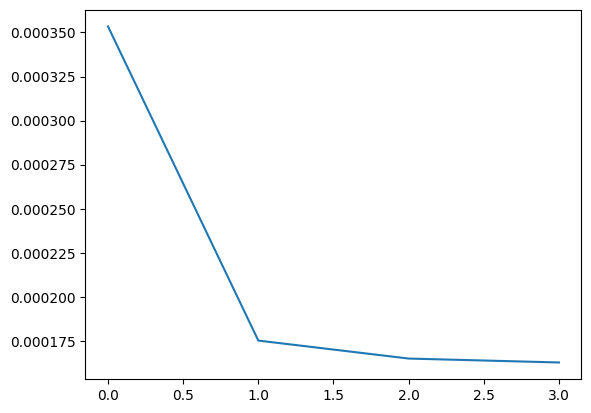

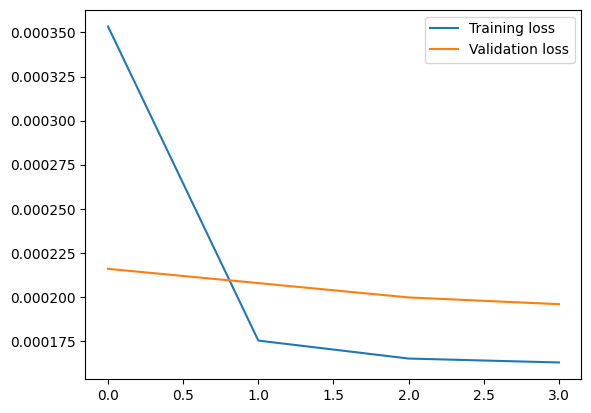

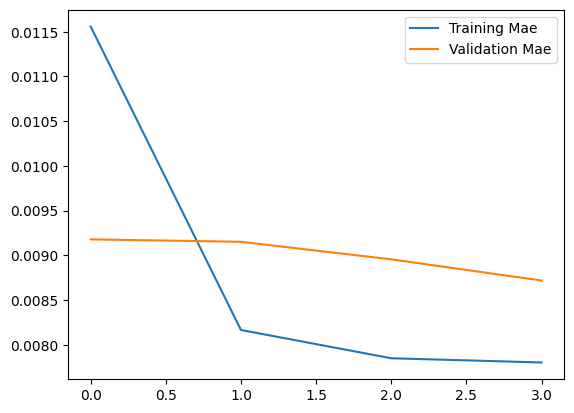

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13536/13536 [==============================] - 86s 6ms/step


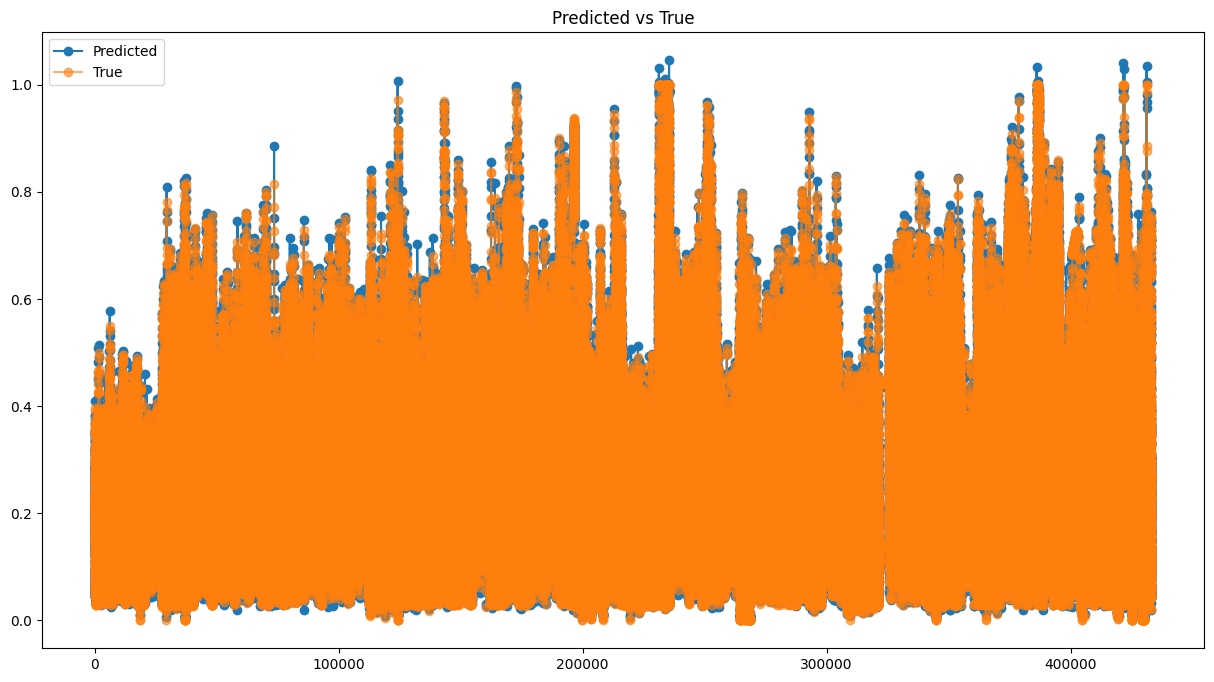

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.010905412810293346,
 'mse': 0.01669998651429156,
 'rmse': 0.00027888954957752}